In [24]:
import tensorflow as tf

config={
    "batch_size":32,
    "im_size":256,
    "learning_rate":0.001,
    "n_epochs":20,
    "dropout_rate":0.0,
    "regularization_rate":0.0,
    "n_filters":6,
    "kernel_size":3,
    "n_strides":1,
    "pool_size":2,
    "dense_1":100,
    "dense_2":10, 
    "num_classes":3
}

#define dataset directory
train_directory = "Emotions Dataset/Emotions Dataset/train"
val_directory = "Emotions Dataset/Emotions Dataset/test"
class_names=["angry", "happy", "sad"]


#load dataset
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=class_names,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99
)

val_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=class_names,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99
)



Found 6799 files belonging to 3 classes.
Found 2278 files belonging to 3 classes.


In [8]:
import matplotlib.pyplot as plt

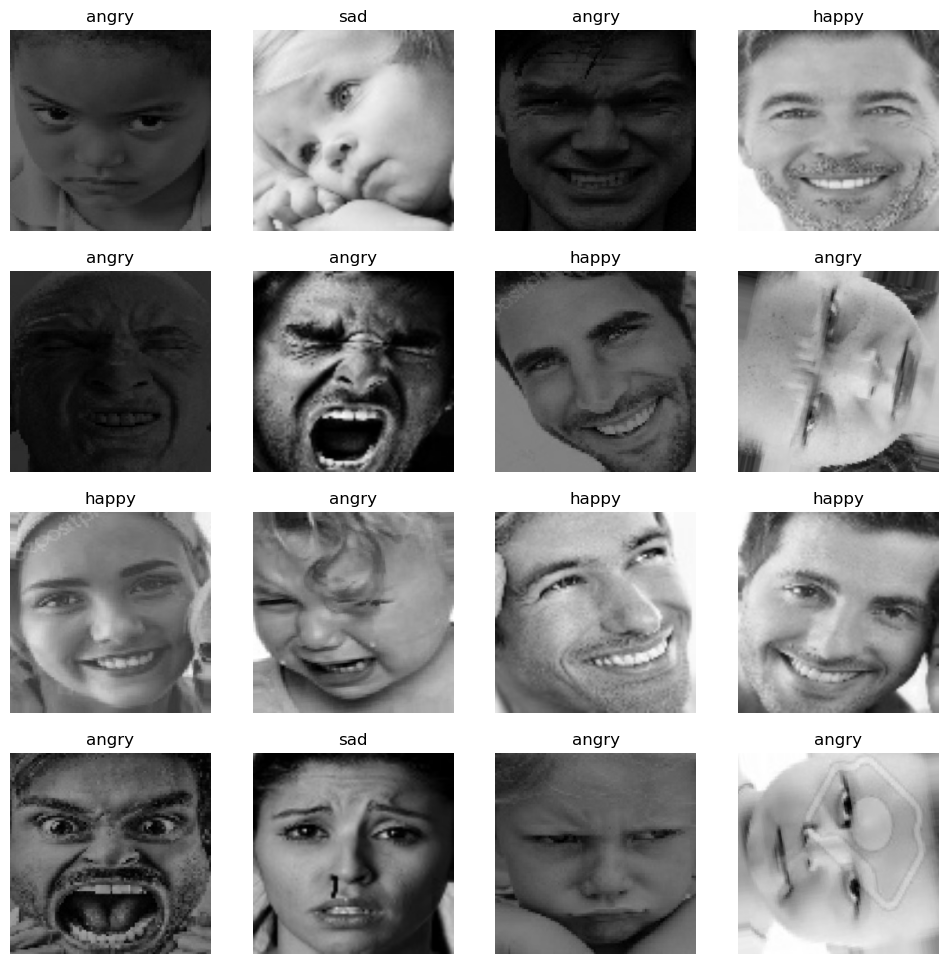

In [20]:
# view images : data visualization

plt.figure(figsize=(12, 12))

def getlabel(int):
    if int ==0:
        return "angry"
    elif int == 1:
        return "happy"
    else:
        return "sad"
        


for image, label in train_dataset.take(1):
    for i in range(16):
        
        ax= plt.subplot(4, 4, i+1)
        plt.imshow(image[i]/255.)
        plt.title(getlabel(tf.argmax(label[i], axis=0).numpy()))
        plt.axis("off")
        
        

In [21]:
# autotune dataset

training_dataset = (train_dataset.prefetch(tf.data.AUTOTUNE))

validaiton_dataset = (val_dataset.prefetch(tf.data.AUTOTUNE))

In [36]:
resize_rescale_layers = tf.keras.Sequential([
    tf.keras.layers.Resizing(256, 256),
    tf.keras.layers.Rescaling(1./255)
])

In [38]:
lenet_model=tf.keras.Sequential([
    #input
    tf.keras.layers.InputLayer(shape=(None, None, 3)),
    #rescale input
    resize_rescale_layers,
    #tf.keras.layers.Rescaling(1./255, name="rescaling"),
    
    # layer 1
    tf.keras.layers.Conv2D(filters=config["n_filters"], kernel_size=config["kernel_size"], strides=config["n_strides"], activation="relu", kernel_regularizer=tf.keras.regularizers.L2(config["regularization_rate"])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=config["pool_size"], strides=config["n_strides"]*2),
    tf.keras.layers.Dropout(rate=config["dropout_rate"]),
    
    
    # layer 2
    tf.keras.layers.Conv2D(filters=config["n_filters"]*2+4, kernel_size=config["kernel_size"], strides=config["n_strides"], activation="relu", kernel_regularizer=tf.keras.regularizers.L2(config["regularization_rate"])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=config["pool_size"], strides=config["n_strides"]*2),
    
    # flatten
    tf.keras.layers.Flatten(),
    
    # Dense layer1
    tf.keras.layers.Dense(config["dense_1"], activation="relu", kernel_regularizer=tf.keras.regularizers.L2(config["regularization_rate"])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=config["dropout_rate"]),
    
    # Dense layer2
    tf.keras.layers.Dense(config["dense_2"], activation="relu", kernel_regularizer=tf.keras.regularizers.L2(config["regularization_rate"])),
    tf.keras.layers.BatchNormalization(),
    
    #dense layer 3
    tf.keras.layers.Dense(config["num_classes"], activation="softmax")  
    
]) 

lenet_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │     6,150,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,153,119 (23.47 MB)

 Trainable params: 6,152,855 (23.47 MB)

 Non-trainable params: 264 (1.03 KB)

In [39]:
loss= tf.keras.losses.CategoricalCrossentropy()

In [40]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy"),tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="top_k_accuracy"),]

In [41]:
lenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=loss,
    metrics=metrics,                      
)

In [42]:
history = lenet_model.fit(training_dataset, validation_data=validaiton_dataset, epochs=20, verbose=1)

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 104s 479ms/step - accuracy: 0.4918 - loss: 1.0759 - top_k_accuracy: 0.7899 - val_accuracy: 0.5079 - val_loss: 0.9980 - val_top_k_accuracy: 0.8161
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 101s 476ms/step - accuracy: 0.6642 - loss: 0.7624 - top_k_accuracy: 0.8851 - val_accuracy: 0.5364 - val_loss: 0.9561 - val_top_k_accuracy: 0.8323
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 109s 514ms/step - accuracy: 0.7848 - loss: 0.5439 - top_k_accuracy: 0.9413 - val_accuracy: 0.6356 - val_loss: 0.8922 - val_top_k_accuracy: 0.8617
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 103s 485ms/step - accuracy: 0.8540 - loss: 0.3960 - top_k_accuracy: 0.9673 - val_accuracy: 0.6738 - val_loss: 0.8278 - val_top_k_accuracy: 0.8657
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 100s 468ms/step - accuracy: 0.8852 - loss: 0.3133 - top_k_accuracy: 0.9736 - val_accuracy: 0.7006 - val_loss: 0.8681 - val_top_k_accuracy: 0.8894
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 94s 441ms/step - accuracy: 0.9

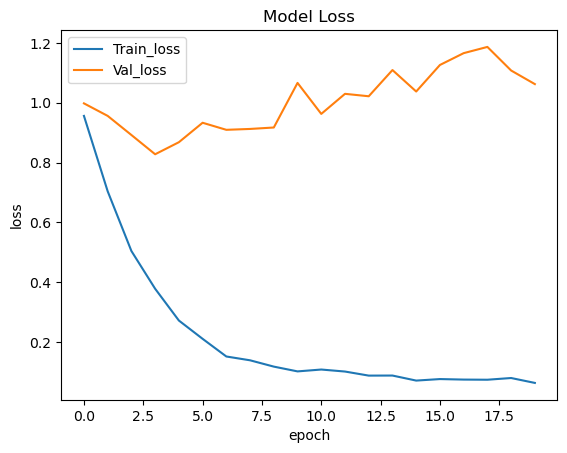

In [45]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Train_loss", "Val_loss"])
plt.show()

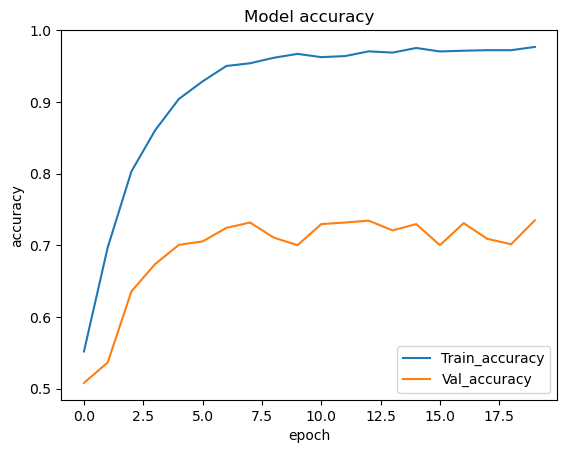

In [46]:

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Train_accuracy", "Val_accuracy"])
plt.show()

In [47]:
lenet_model.evaluate(validaiton_dataset)

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.7254 - loss: 1.1051 - top_k_accuracy: 0.8982


[1.0624185800552368, 0.7348551154136658, 0.9043020009994507]

In [50]:
# test model

import cv2 

test_image = cv2.imread('Emotions Dataset/Emotions Dataset/test/angry/2585.jpg') 

im = tf.constant(test_image, dtype="float32")

im=tf.expand_dims(im, axis=0)

result = class_names[tf.argmax(lenet_model(im), axis=-1).numpy()[0]]
print(result)
print(im.shape)

angry
(1, 90, 90, 3)


In [54]:
# Save the model architecture as a JSON string
model_json = lenet_model.to_json()

# Write the JSON string to a file
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

# Save the weights to an HDF5 file
lenet_model.save_weights('model.weights.h5')
